# Generalized Autoregressive Heteroskedastic Model (GARCH)

In [1]:
# packages needed for GARCH model
install.packages("tseries")
require("tseries")


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//Rtmpg81dDa/downloaded_packages


Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [7]:
# These are coefficients for GARCH(1,1) model
alpha0 <- 0.1
alpha1 <- 0.4
beta1 <- 0.2

In [3]:
# white noise term values
w <- rnorm(2000)
head(w)

[1]  1.5563212  0.2582716  1.1426181  1.0216168 -1.3982450 -0.5708706

In [4]:
# the actual x(t) time series
x <- rep(0,2000)
head(x)

[1] 0 0 0 0 0 0

In [5]:
# volatility squared values
sigma2 <- rep(0,2000)
head(sigma2)

[1] 0 0 0 0 0 0

In [8]:
# GARCH(1,1) model simulation
for(t in 2:2000){
    sigma2[t] <- alpha0+alpha1*(x[t-1]^2)+beta1*sigma2[t-1]
    x[t] <- w[t]*sqrt(sigma2[t])
}

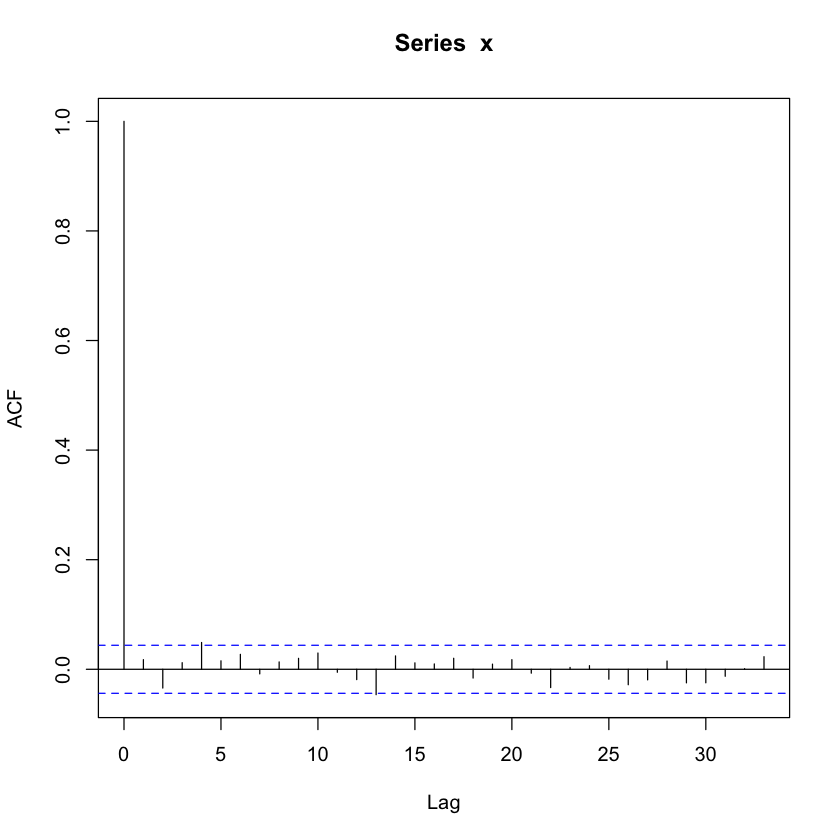

In [9]:
# autocorrelation plot
acf(x) # it sems to be OK

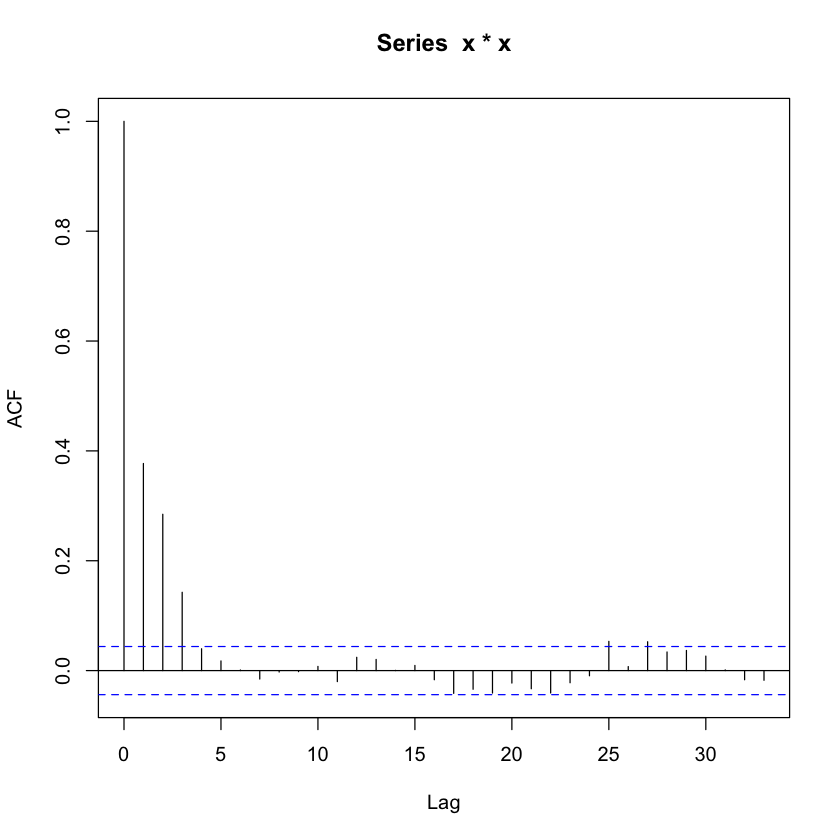

In [10]:
# but the squared residuals shows there is volatility clustering
acf(x*x)

In [13]:
# use the GARCH function
x.garch <- garch(x, trace=FALSE)
x.garch


Call:
garch(x = x, trace = FALSE)

Coefficient(s):
     a0       a1       b1  
0.09752  0.42676  0.19413  


In [14]:
# show the confidence intervals for the parameters
confint(x.garch)

,2.5 %,97.5 %
a0,0.07722045,0.1178109
a1,0.34458360,0.5089412
b1,0.09072573,0.2975368
